In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Baca dataset
df = pd.read_csv("vle.csv")

In [3]:
# Tampilkan 5 baris pertama
df.head(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [4]:
# Tampilkan 5 baris terakhir
df.tail(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [5]:
# Menampilkan Informasi tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None


In [6]:
# Statistik deskriptif untuk kolom kategorikal
df.describe(include='object')


,code_module,code_presentation,activity_type
count,6364,6364,6364
unique,7,4,20
top,FFF,2013J,resource
freq,1967,1772,2660


In [7]:
# Periksa data yang hilang
missing_data = df.isnull().sum()
print(missing_data)


id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [8]:
# Menghapus baris dengan nilai yang hilang
data = df.dropna()

In [9]:
# Mengganti nilai yang hilang dengan rata-rata kolom
data['week_from'].fillna(data['week_from'].mean(), inplace=True)
data['week_to'].fillna(data['week_to'].mean(), inplace=True)


/var/folders/74/x1by4_ss18d7vfym5n0y71940000gn/T/ipykernel_16540/4005175862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_from'].fillna(data['week_from'].mean(), inplace=True)
/var/folders/74/x1by4_ss18d7vfym5n0y71940000gn/T/ipykernel_16540/4005175862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_to'].fillna(data['week_to'].mean(), inplace=True)


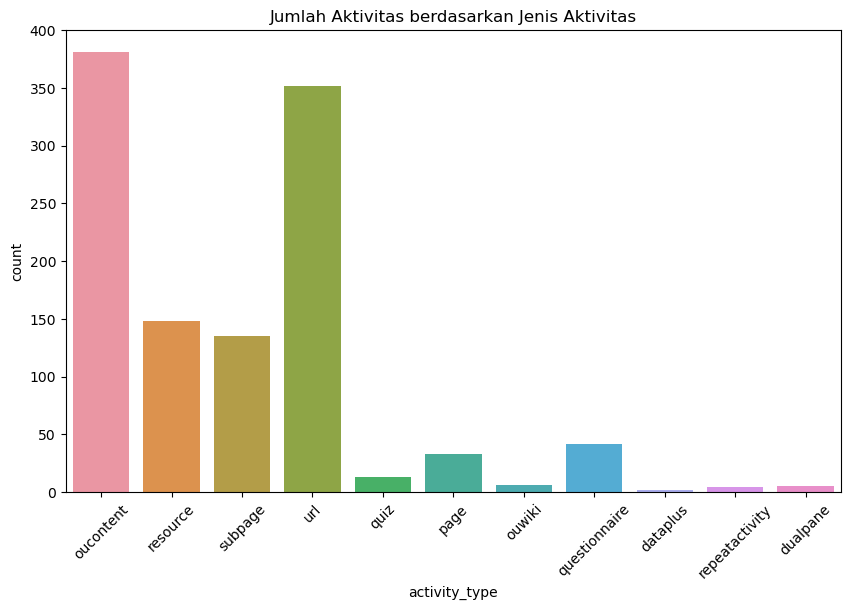

In [10]:
# Plot jumlah aktivitas berdasarkan jenis aktivitas menggunakan histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='activity_type')
plt.title('Jumlah Aktivitas berdasarkan Jenis Aktivitas')
plt.xticks(rotation=45)
plt.show()


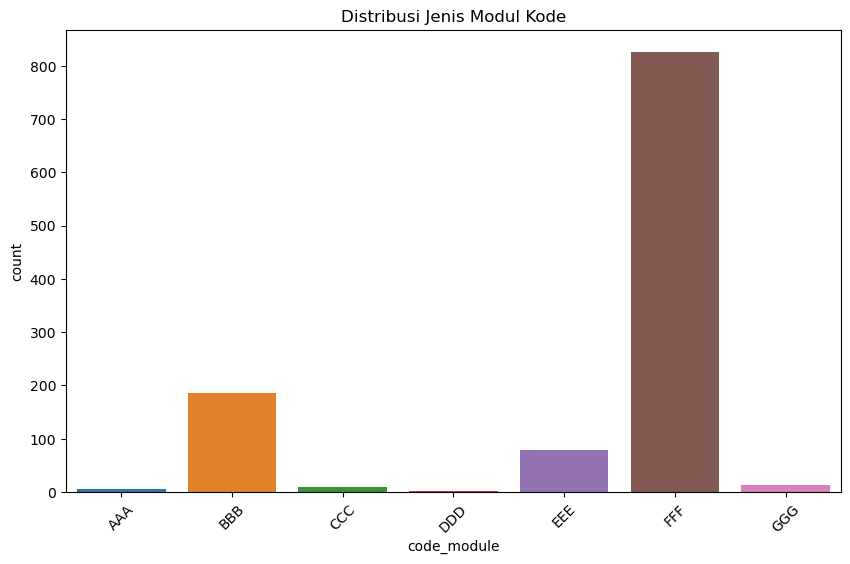

In [11]:
# Melakukan plotting fitur code_module menggunakan histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='code_module')
plt.title('Distribusi Jenis Modul Kode')
plt.xticks(rotation=45)
plt.show()


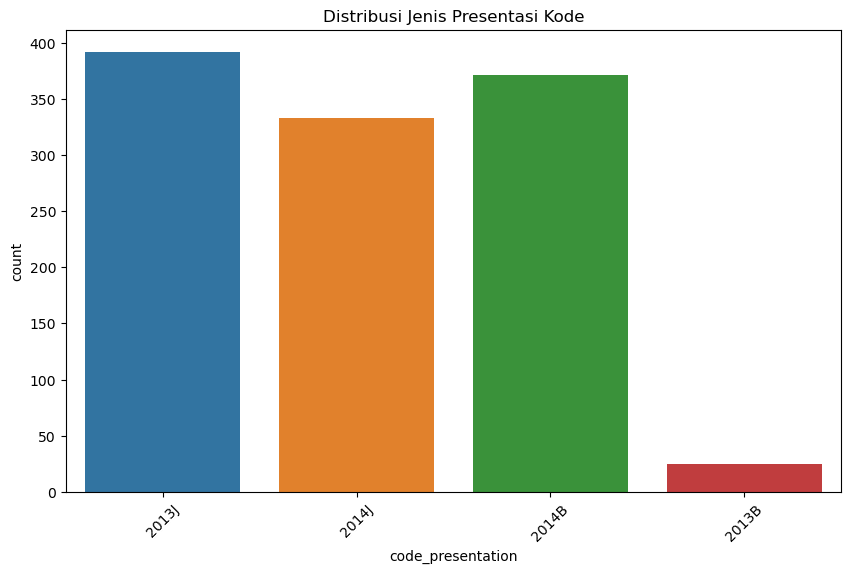

In [12]:
# Melakukan plotting fitur code_presentation menggunakan histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='code_presentation')
plt.title('Distribusi Jenis Presentasi Kode')
plt.xticks(rotation=45)
plt.show()

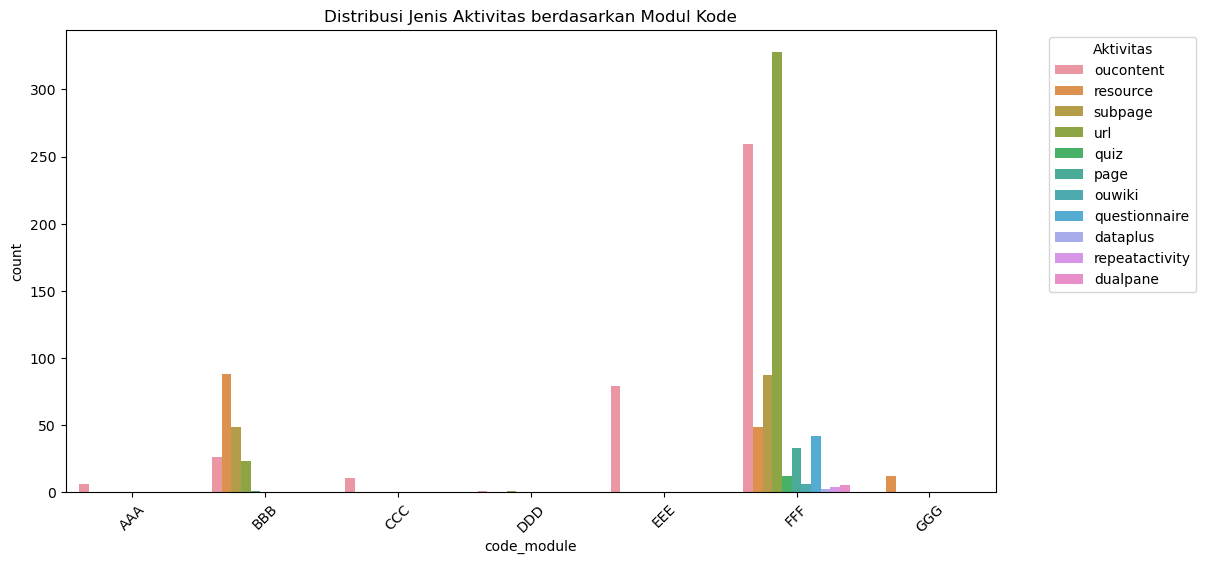

In [13]:
# Melakukan plotting code_modul menggunakan countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='code_module', hue='activity_type')
plt.title('Distribusi Jenis Aktivitas berdasarkan Modul Kode')
plt.xticks(rotation=45)
plt.legend(title='Aktivitas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/74/x1by4_ss18d7vfym5n0y71940000gn/T/ipykernel_16540/2012874057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_from'] = pd.to_numeric(data['week_from'], errors='coerce')
/var/folders/74/x1by4_ss18d7vfym5n0y71940000gn/T/ipykernel_16540/2012874057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_to'] = pd.to_numeric(data['week_to'], errors='coerce')


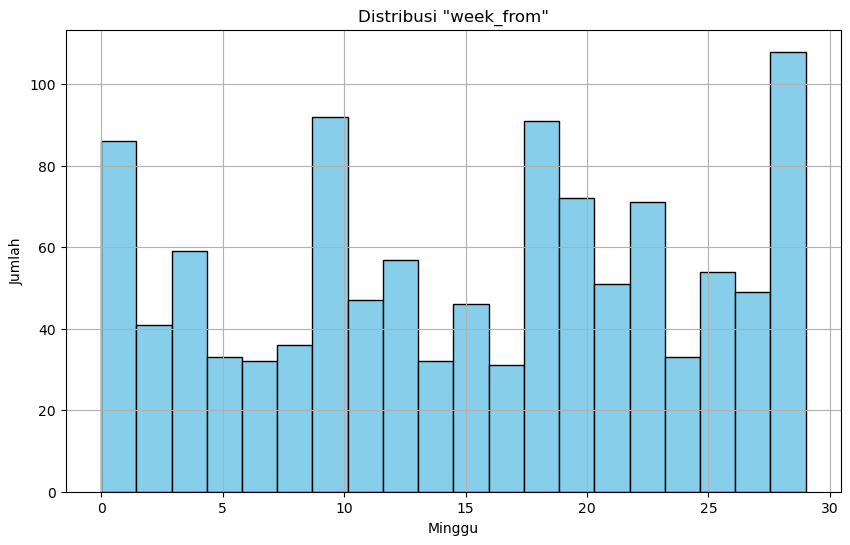

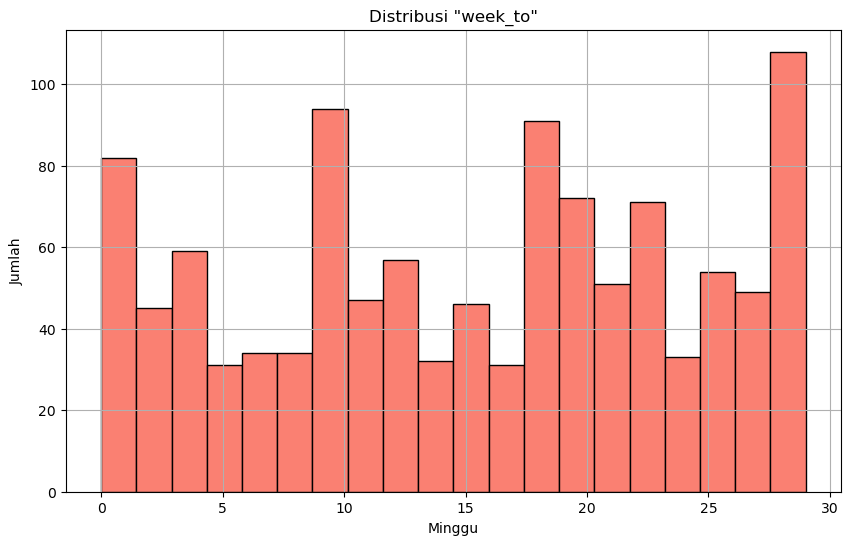

In [14]:
# Konversi kolom "week_from" dan "week_to" menjadi tipe data numerik (jika belum)
data['week_from'] = pd.to_numeric(data['week_from'], errors='coerce')
data['week_to'] = pd.to_numeric(data['week_to'], errors='coerce')

# Visualisasi distribusi "week_from"
plt.figure(figsize=(10, 6))
plt.hist(data['week_from'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi "week_from"')
plt.xlabel('Minggu')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

# Visualisasi distribusi "week_to"
plt.figure(figsize=(10, 6))
plt.hist(data['week_to'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribusi "week_to"')
plt.xlabel('Minggu')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()
